In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("laptop_price.csv")
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
df.info()
# No null values
# 1302 rows and 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


## Data Cleaning

In [299]:
# ScreenResolution
df.ScreenResolution.unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [300]:
# if laptop has touchscreen then 1 and 0 otherwise
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

#extract only screen resolution
df['ScreenResolution'] = df.ScreenResolution.str.extract(r'(\d+x\d+)')

In [301]:
df['ScreenResolution'].unique()

array(['2560x1600', '1440x900', '1920x1080', '2880x1800', '1366x768',
       '2304x1440', '3200x1800', '1920x1200', '2256x1504', '3840x2160',
       '2160x1440', '2560x1440', '1600x900', '2736x1824', '2400x1600'],
      dtype=object)

In [302]:
# High Definition (HD)     -->   1280 x 720
# Full HD, FHD             -->   1920 x 1080
# 2K, Quad HD, QHD         -->   2560 x 1440
# 4K, Ultra HD             -->    3840 x 2160

# Add names for resolutions

In [303]:
SRT = { '1366x768':'HD+', '1440x900':'HD+', '1600x900':'HD+',
 '1920x1080':'FHD', '1920x1200':'FHD+', '2160x1440':'FHD+', '2256x1504':'FHD+', '2304x1440':'FHD+', '2400x1600':'FHD+',
 '2560x1440':'QHD', '2560x1600':'QHD+', '2736x1824':'QHD+', '2880x1800':'QHD+', '3200x1800':'QHD+', '3840x2160':'Ultra HD'}

In [304]:
df['ScreenResolutionType'] = df['ScreenResolution'].map(SRT)

In [305]:
df.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,ScreenResolutionType
0,1,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,QHD+
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,HD+


In [306]:
#Cpu
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [307]:
# extarct only processor name
df['CPU'] = df['Cpu'].str.extract(r'(i\d|AMD|Samsung|Pentium|Celeron|Atom|Core M|Xeon)')

In [308]:
df['CPU'].unique()

array(['i5', 'i7', 'AMD', 'i3', 'Core M', 'Atom', 'Celeron', 'Pentium',
       'Xeon', 'Samsung'], dtype=object)

In [309]:
df[df['CPU']=='AMD'].Cpu.unique()
# we dont have any laptops of AMD Ryzen processors

array(['AMD A9-Series 9420 3GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'AMD E-Series E2-6110 1.5GHz', 'AMD A6-Series 9220 2.5GHz',
       'AMD Ryzen 1700 3GHz', 'AMD FX 9830P 3GHz',
       'AMD E-Series 6110 1.5GHz', 'AMD A6-Series 9220 2.9GHz',
       'AMD E-Series 9000e 1.5GHz', 'AMD A10-Series A10-9620P 2.5GHz',
       'AMD A6-Series A6-9220 2.5GHz', 'AMD A10-Series 9600P 2.4GHz',
       'AMD A8-Series 7410 2.2GHz', 'AMD A12-Series 9720P 2.7GHz',
       'AMD A12-Series 9720P 3.6GHz', 'AMD Ryzen 1600 3.2GHz',
       'AMD A10-Series 9620P 2.5GHz', 'AMD E-Series 7110 1.8GHz',
       'AMD A9-Series A9-9420 3GHz', 'AMD E-Series E2-9000 2.2GHz',
       'AMD A9-Series 9420 2.9GHz', 'AMD A6-Series 7310 2GHz',
       'AMD A12-Series 9700P 2.5GHz', 'AMD A4-Series 7210 2.2GHz',
       'AMD FX 8800P 2.1GHz', 'AMD E-Series 9000 2.2GHz',
       'AMD A9-Series 9410 2.9GHz'], dtype=object)

In [310]:
# categorize Atom, Celeron, Pentium processors as Intel EntryLevel Processors.
def CPU_category(cpu):
    if cpu in ['Atom', 'Celeron', 'Pentium']:
        return 'Intel EntryLevel Processors'
    else:
        return cpu
    
df['CPU'] = df['CPU'].apply(CPU_category)

In [311]:
df['CPU'].unique()

array(['i5', 'i7', 'AMD', 'i3', 'Core M', 'Intel EntryLevel Processors',
       'Xeon', 'Samsung'], dtype=object)

In [312]:
# Ram
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [313]:
# extract only ram size in numbers
df['RAM'] = df['Ram'].str.replace('GB','')

In [314]:
# Memory
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [315]:
# extract only memory size in numbers and type of memory
df['Storage'] = df['Memory'].str.extract(r'(\d+GB|\d+TB)')
df['Storage'] = df['Storage'].str.extract(r'(\d+)').astype('int64')
df['Storage'] = list((map((lambda x: x*1000 if x < 16 else x),df['Storage'])))

In [316]:
df['Storage'].unique()

array([ 128,  256,  512,  500, 1000,   32,   64, 2000,    0,   16,  180,
        240, 8000,  508], dtype=int64)

In [317]:
#OpSys
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [318]:
# Categorize all versions of Windows as Windows and all versions of Mac OS as Mac OS.
def operatingSys(os):
    if os in ['Windows 10', 'Windows 7', 'Windows 10 S']:
        return 'Windows'
    elif os in ['macOS', 'Mac OS X']:
        return 'Mac'
    elif os in ['Chrome OS', 'Android']:
        return 'Chrome OS'
    else:
        return os
df['OperatingSystem'] = df['OpSys'].apply(operatingSys)

In [319]:
df['OperatingSystem'].value_counts()

Windows      1125
No OS          66
Linux          62
Chrome OS      29
Mac            21
Name: OperatingSystem, dtype: int64

In [320]:
# Extract only weight in numbers
df['Weight'] = df['Weight'].str.replace('kg','')

In [321]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [322]:
df['Gpu'].nunique()

110

In [323]:
# extract only gpu brand
df['GPU'] = df['Gpu'].apply(lambda x:x.split()[0])
df = df[~df['GPU'].str.contains('ARM')]

In [324]:
df['GPU'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: GPU, dtype: int64

In [325]:
#convert price in euro to USD based on dataset provided date exchange rate
df['Price'] = round(df['Price_euros']*1.10,0)

In [326]:
df.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Weight,Price_euros,TouchScreen,ScreenResolutionType,CPU,RAM,Storage,OperatingSystem,GPU,Price
0,1,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,...,1.37,1339.69,0,QHD+,i5,8,128,Mac,Intel,1474.0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,...,1.34,898.94,0,HD+,i5,8,128,Mac,Intel,989.0


In [327]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros', 'TouchScreen', 'ScreenResolutionType', 'CPU', 'RAM',
       'Storage', 'OperatingSystem', 'GPU', 'Price'],
      dtype='object')

In [328]:
# drop columns
df.drop(columns=['laptop_ID', 'Product', 'Cpu','ScreenResolution', 'Ram', 'Memory', 'Gpu', 'OpSys','Price_euros'], axis=1, inplace=True)

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1302 non-null   object 
 1   TypeName              1302 non-null   object 
 2   Inches                1302 non-null   float64
 3   Weight                1302 non-null   object 
 4   TouchScreen           1302 non-null   int64  
 5   ScreenResolutionType  1302 non-null   object 
 6   CPU                   1302 non-null   object 
 7   RAM                   1302 non-null   object 
 8   Storage               1302 non-null   int64  
 9   OperatingSystem       1302 non-null   object 
 10  GPU                   1302 non-null   object 
 11  Price                 1302 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 132.2+ KB


In [330]:
# change the data type of the columns
df['RAM'] = df['RAM'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [331]:
df.head()

,Company,TypeName,Inches,Weight,TouchScreen,ScreenResolutionType,CPU,RAM,Storage,OperatingSystem,GPU,Price
0,Apple,Ultrabook,13.3,1.37,0,QHD+,i5,8,128,Mac,Intel,1474.0
1,Apple,Ultrabook,13.3,1.34,0,HD+,i5,8,128,Mac,Intel,989.0
2,HP,Notebook,15.6,1.86,0,FHD,i5,8,256,No OS,Intel,632.0
3,Apple,Ultrabook,15.4,1.83,0,QHD+,i7,16,512,Mac,AMD,2791.0
4,Apple,Ultrabook,13.3,1.37,0,QHD+,i5,8,256,Mac,Intel,1984.0


# Exploratory Data Analysis

#### Univariate Statistics

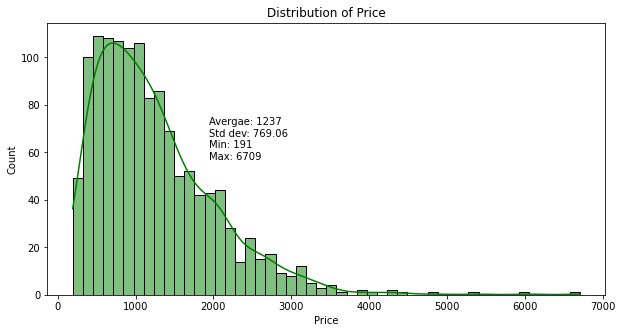

In [332]:
# What is Distribution of Laptop Prices?

plt.figure(figsize=(10,5))
sns.histplot(df['Price'], bins=50, kde=True, color='green', label='Price', alpha=0.5) 
text = 'Avergae: ' + str(round(df.Price.mean())) + '\n'
text += 'Std dev: ' + str(round(df.Price.std(),2)) + '\n'
text += 'Min: ' + str(round(df.Price.min())) + '\n'
text += 'Max: '+ str(round(df.Price.max()))
plt.text(0.35, 0.5, text, fontsize=10, transform=plt.gcf().transFigure)
plt.title("Distribution of Price")
plt.show()
# price is not normally distributed it is left skewed.
# Consumers/customers are prefering to buy budget laptops over expensive ones.

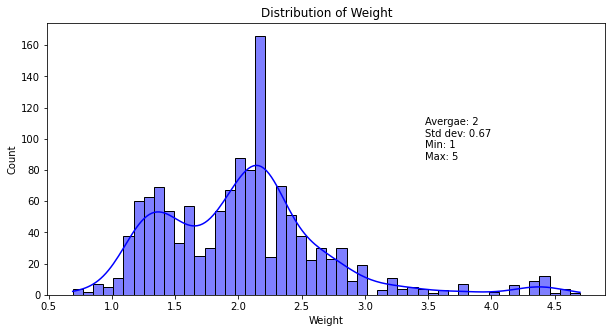

In [333]:
# What is the distribution of the weight of the laptop?

plt.figure(figsize=(10,5))
sns.histplot(df['Weight'], bins=50, kde=True, color='blue', label='Price', alpha=0.5) 
text = 'Avergae: ' + str(round(df.Weight.mean())) + '\n'
text += 'Std dev: ' + str(round(df.Weight.std(),2)) + '\n'
text += 'Min: ' + str(round(df.Weight.min())) + '\n'
text += 'Max: '+ str(round(df.Weight.max()))
plt.text(0.65, 0.5, text, fontsize=10, transform=plt.gcf().transFigure)
plt.title("Distribution of Weight")
plt.show()

# most of the weight is in the range of 1-2kg.
# above 2kg is considered as heavy weight laptop and gaming laptops are mostly in this range.

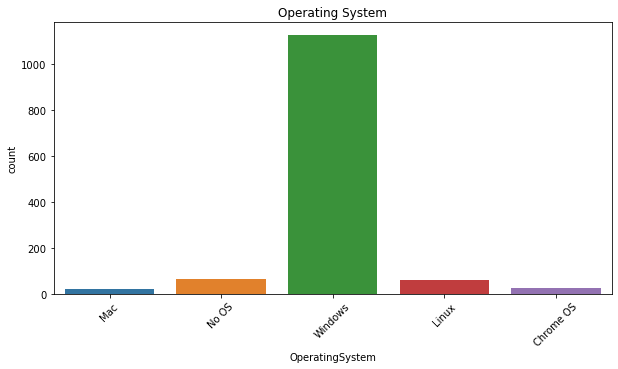

In [334]:
# Which operating system is most popular?

plt.figure(figsize=(10,5))
sns.countplot(x='OperatingSystem', data=df)
plt.title("Operating System")
plt.xticks(rotation = 45)
plt.show()

# Windows is the most popular operating system beacuse of its ease of use and high performance with variaes price range.

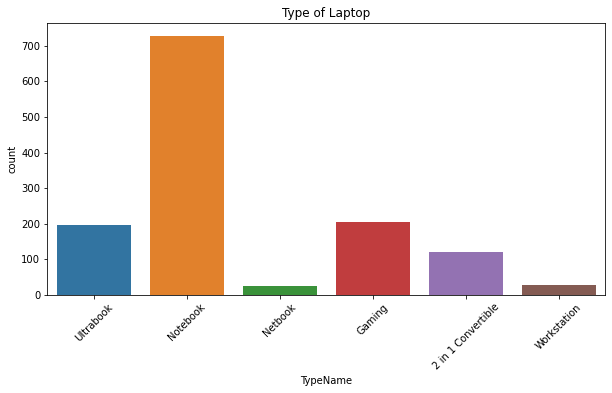

In [335]:
# Which type of laptop is most popular?
plt.figure(figsize=(10,5))
sns.countplot(x='TypeName', data=df)
plt.title("Type of Laptop")
plt.xticks(rotation = 45)
plt.show()

# Notebook is the most popular type of laptop beacuse of its high performance and ease of use and portability.

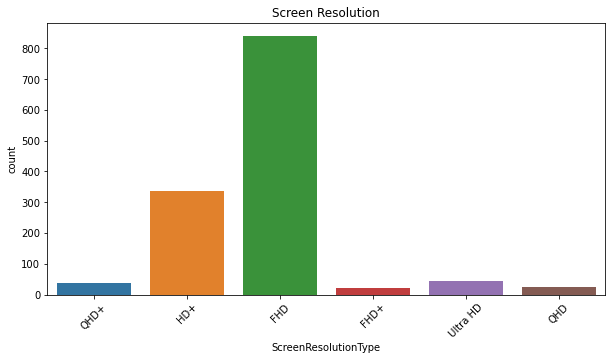

In [336]:
# Which Screen Resolution is most popular?
plt.figure(figsize=(10,5))
sns.countplot(x='ScreenResolutionType', data=df)
plt.title("Screen Resolution")
plt.xticks(rotation = 45)
plt.show()

# Most laptops have FHD Screen Resolution.

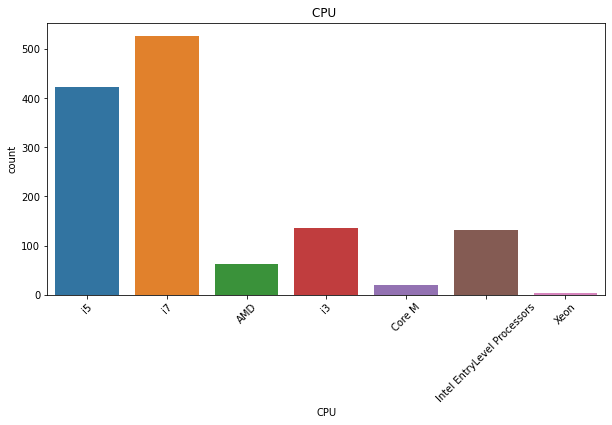

In [337]:
# Which CPU is most popular?
plt.figure(figsize=(10,5))
sns.countplot(x='CPU', data=df)
plt.title("CPU ")
plt.xticks(rotation = 45)
plt.show()

# Most laptops have Intel processors.

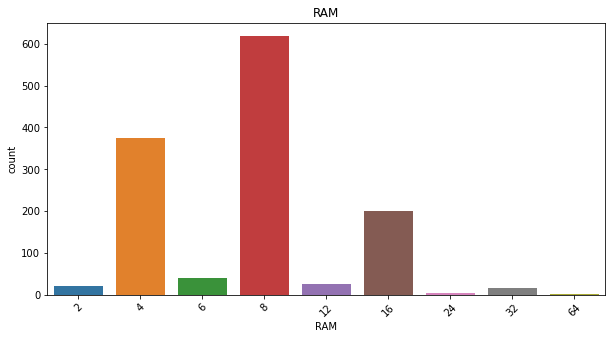

In [338]:
# Which RAM size is most popular?
plt.figure(figsize=(10,5))
sns.countplot(x='RAM', data=df)
plt.title("RAM")
plt.xticks(rotation = 45)
plt.show()
# Most laptops has under 8GB RAM
# We can clearly see only few laptops with above 16GB RAM.

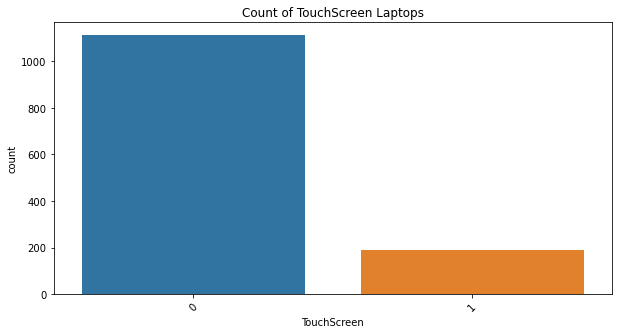

In [339]:
# Distribution of  TouchScreen laptops?
plt.figure(figsize=(10,5))
sns.countplot(x='TouchScreen', data=df)
plt.title("Count of TouchScreen Laptops")
plt.xticks(rotation = 45)
plt.show()

#### Bivariate Statistics

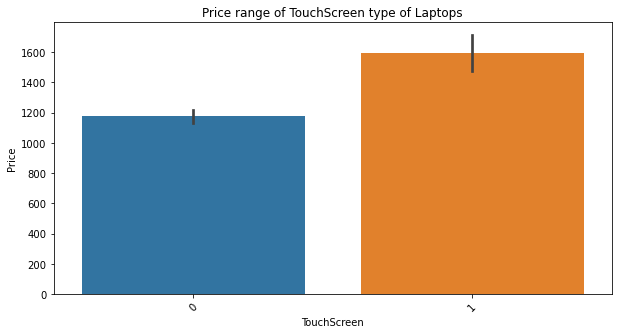

In [340]:
# Whether TouchScreen laptops are more expensive or less expensive?
plt.figure(figsize = (10,5))
sns.barplot(x = df['TouchScreen'], y = df['Price'])
plt.title("Price range of TouchScreen type of Laptops")
plt.xticks(rotation = 45)
plt.show()
# TouchScreen laptops are more expensive than non-TouchScreen laptops.

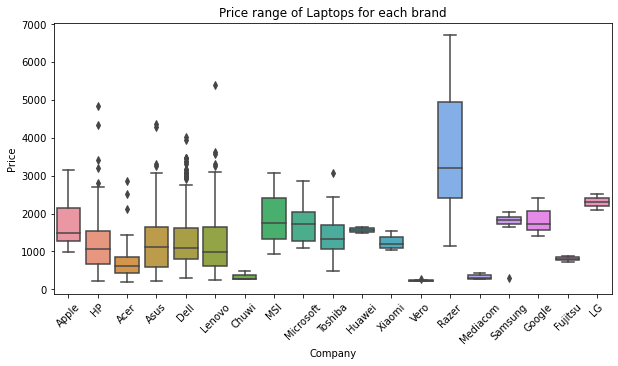

In [341]:
#what is price range of laptop for each brand?
plt.figure(figsize = (10,5))
sns.boxplot(x = df['Company'], y = df['Price'])
plt.title("Price range of Laptops for each brand")
plt.xticks(rotation = 45)
plt.show()
#Razer laptops are the most expensive beacuse they make gaming latops.

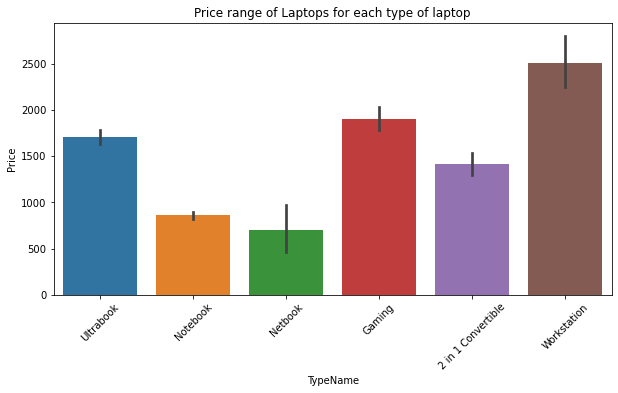

In [342]:
# What is price range of each type of laptop?
plt.figure(figsize = (10,5))
sns.barplot(x = df['TypeName'], y = df['Price'])
plt.title("Price range of Laptops for each type of laptop")
plt.xticks(rotation = 45)
plt.show()
# Notebooks and Netbooks are budget friendly latops and Workstation are expensive.

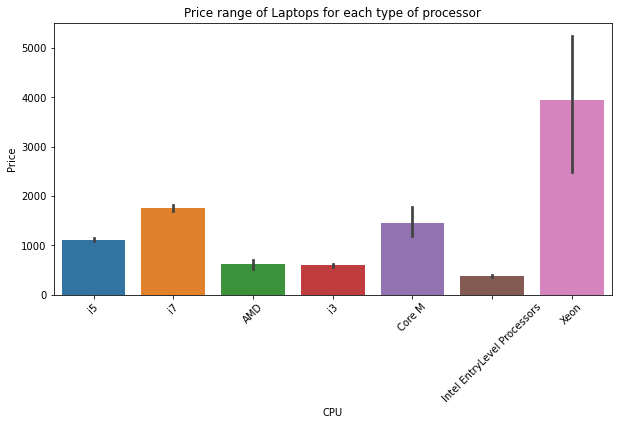

In [343]:
# What is price range of each type of processor?
plt.figure(figsize=(10,5))
sns.barplot(x = df['CPU'], y = df['Price'])
plt.title("Price range of Laptops for each type of processor")
plt.xticks(rotation = 45)
plt.show()
#Xeon powered laptops are expensive than i7 powered laptops.
#Genrally xeon processors are used in workstations.

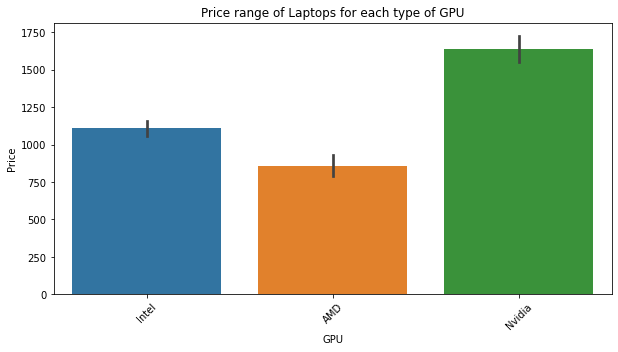

In [344]:
# What is price range of each type of GPU?
plt.figure(figsize=(10,5))
sns.barplot(x = df['GPU'], y = df['Price'])
plt.title("Price range of Laptops for each type of GPU")
plt.xticks(rotation = 45)
plt.show()
# Nvidia GPUs make laptop price is more expensive.
# Nvidia GPUs are used in gaming laptops.

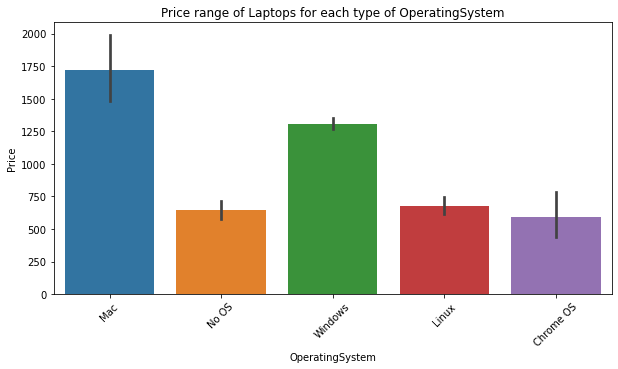

In [345]:
# What is price range of each type of OperatingSystem?
plt.figure(figsize=(10,5))
sns.barplot(x = df['OperatingSystem'], y = df['Price'])
plt.title("Price range of Laptops for each type of OperatingSystem")
plt.xticks(rotation = 45)
plt.show()
# Mac OS laptops are expensive than all other laptops.
# Mac OS laptops price range is more than other laptops.

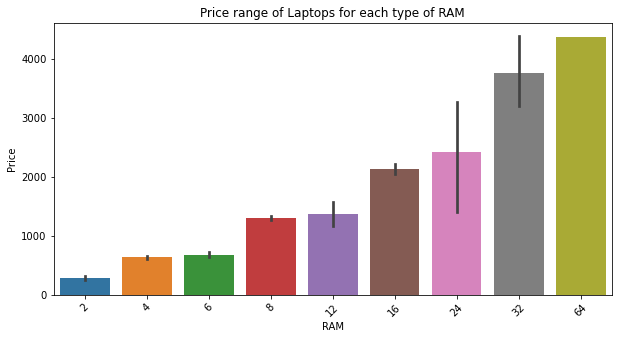

In [346]:
# What is price range of each type of RAM?
plt.figure(figsize=(10,5))
sns.barplot(x = df['RAM'], y = df['Price'])
plt.xticks(rotation = 45)
plt.title("Price range of Laptops for each type of RAM")
plt.show()

# As the RAM size increases, the price of the laptop increases because more RAM is used in expensive laptops.

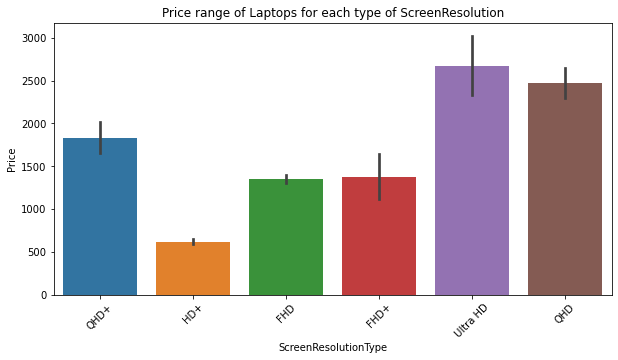

In [347]:
# What is price range of each type of ScreenResolution?
plt.figure(figsize=(10,5))
sns.barplot(x = df['ScreenResolutionType'], y = df['Price'])
plt.xticks(rotation = 45)
plt.title("Price range of Laptops for each type of ScreenResolution")
plt.show()
# Ultra HD ScreenResolutionType laptops are expensive because UHD panel cost is high compare to other types

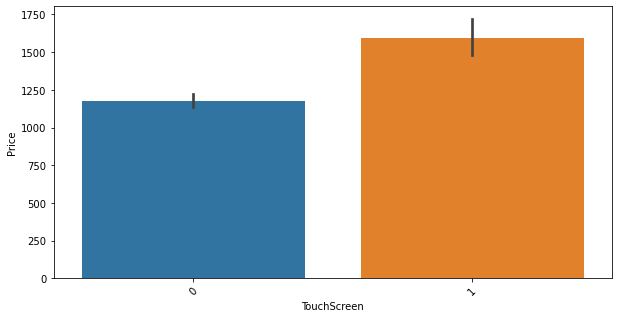

In [348]:
plt.figure(figsize=(10,5))
sns.barplot(x = df['TouchScreen'], y = df['Price'])
plt.xticks(rotation = 45)
plt.show()
# Touch screens are expensive than non touch screens.

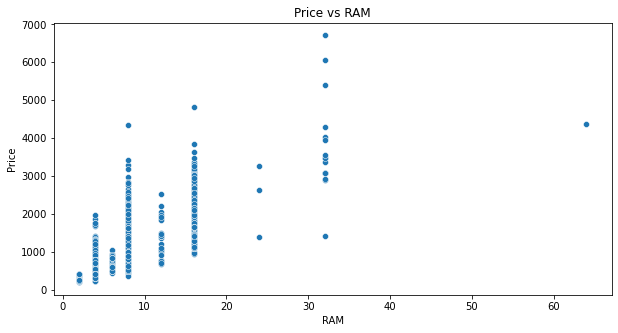

In [349]:
# Does the price of a laptop vary with the GB of RAM?
plt.figure(figsize=(10,5))
sns.scatterplot(x = df['RAM'], y = df['Price'])
plt.title("Price vs RAM")
plt.show()

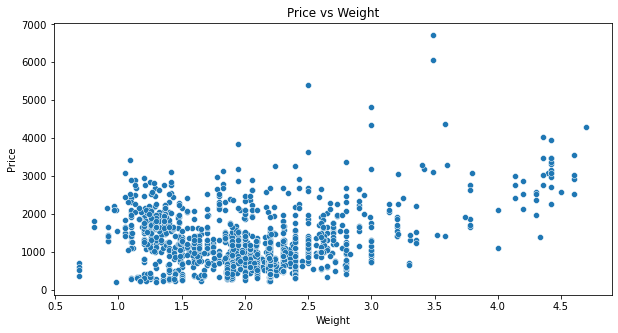

In [350]:
# Does the price of a laptop vary with the weight?
plt.figure(figsize=(10,5))
sns.scatterplot(x = df['Weight'], y = df['Price'])
plt.title("Price vs Weight")
plt.show()

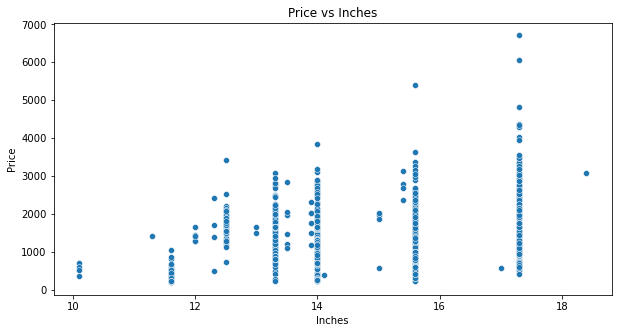

In [351]:
# Does the price of a laptop vary with laptop screen inches?
plt.figure(figsize=(10,5))
sns.scatterplot(x = df['Inches'], y = df['Price'])
plt.title("Price vs Inches")
plt.show()

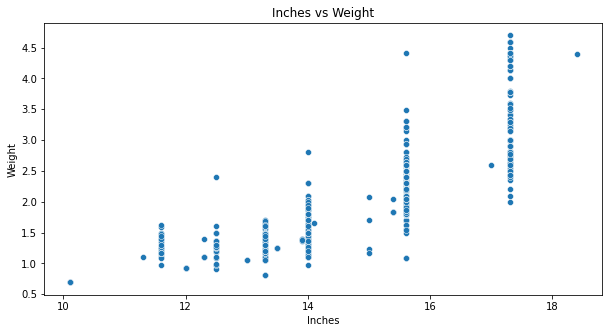

In [352]:
# Does the price of a laptop vary with laptop screen inches?
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Inches'],y=df['Weight'])
plt.title("Inches vs Weight")
plt.show()

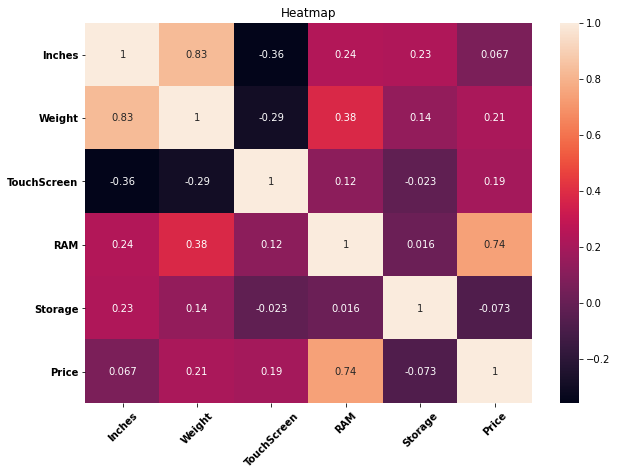

In [353]:
# Correlation Matrix
fig, ax = plt.subplots(figsize=(10,7))  
sns.heatmap(df.corr(),annot = True)
plt.xticks(rotation = 45, fontsize = 10, fontweight = 'bold')
plt.yticks(rotation = 'horizontal', fontsize = 10, fontweight = 'bold')
plt.title("Heatmap")
plt.show()
# Inches and Weight columns are highly correlated because as the laptop screen inches increases weight will also increase
# we can drop any one column between Inches and Weight while building model

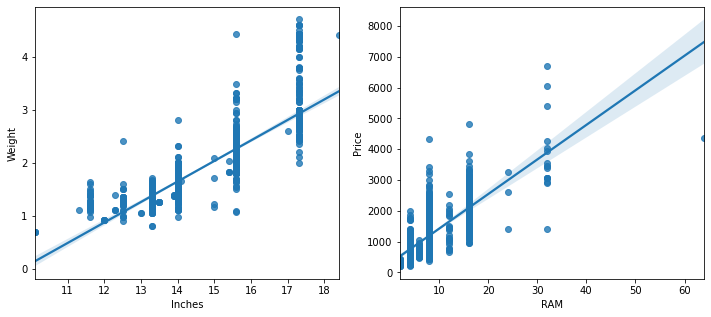

In [354]:
fig, axs = plt.subplots(1,2, figsize=(12,5))
plt1 = sns.regplot(data = df, x = 'Inches', y = 'Weight', ax = axs[0])
plt2 = sns.regplot(data = df, x = 'RAM', y = 'Price', ax = axs[1])

In [355]:
df1 = df.copy(deep=True)

In [362]:
df.head()

,Company,TypeName,Inches,Weight,TouchScreen,ScreenResolutionType,CPU,RAM,Storage,OperatingSystem,GPU,Price
0,Apple,Ultrabook,13.3,1.37,0,QHD+,i5,8,128,Mac,Intel,1474.0
1,Apple,Ultrabook,13.3,1.34,0,HD+,i5,8,128,Mac,Intel,989.0
2,HP,Notebook,15.6,1.86,0,FHD,i5,8,256,No OS,Intel,632.0
3,Apple,Ultrabook,15.4,1.83,0,QHD+,i7,16,512,Mac,AMD,2791.0
4,Apple,Ultrabook,13.3,1.37,0,QHD+,i5,8,256,Mac,Intel,1984.0


# Model

In [381]:
# numerical_variables = ['Inches', 'Weight', 'RAM', 'Storage', 'Price']
# categorical_variables = ['Company', 'TypeName', 'ScreenResolutionType', 'CPU', 'OperatingSystem', 'GPU']

In [390]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

In [415]:
df.head()

,Company,TypeName,Inches,Weight,TouchScreen,ScreenResolutionType,CPU,RAM,Storage,OperatingSystem,GPU,Price
0,Apple,Ultrabook,13.3,1.37,0,QHD+,i5,8,128,Mac,Intel,1474.0
1,Apple,Ultrabook,13.3,1.34,0,HD+,i5,8,128,Mac,Intel,989.0
2,HP,Notebook,15.6,1.86,0,FHD,i5,8,256,No OS,Intel,632.0
3,Apple,Ultrabook,15.4,1.83,0,QHD+,i7,16,512,Mac,AMD,2791.0
4,Apple,Ultrabook,13.3,1.37,0,QHD+,i5,8,256,Mac,Intel,1984.0


In [419]:
X = df.drop(columns=['Price', 'Weight'], axis=1) # Weight column is dropped because of correaltion with Inches column
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=2)

In [420]:
X.head(1)

,Company,TypeName,Inches,TouchScreen,ScreenResolutionType,CPU,RAM,Storage,OperatingSystem,GPU
0,Apple,Ultrabook,13.3,0,QHD+,i5,8,128,Mac,Intel


In [422]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,4,5,6,8,9])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7445733785626814
MAE 251.92851665202264
